In [1]:
import pandas as pd # Data wrangling
import numpy as np # Numerical operations
from sklearn.metrics import accuracy_score,confusion_matrix #Metrics to measure model performance
from sklearn.linear_model import LogisticRegression # ML Model
from sklearn.model_selection import train_test_split # Splitting Data
import seaborn as sns # visualization library
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('UsedCarsSA_Clean_EN.csv')
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,NaN,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,False


In [3]:
df['Current_Year'] = 2021
df['No_Year'] = df['Current_Year'] - df['Year']

In [4]:
df = df.drop(['Year','Current_Year','Origin','Negotiable'],axis = 1)

In [5]:
df=df.dropna()

In [6]:
df['Price']=df['Price'].replace(-np.inf,0)

In [7]:
df=df[df.Price > 0]

In [8]:
# from scipy import stats
# df['Price']=stats.boxcox(df['Price'])[0]
df['Price']=np.log(df['Price'])

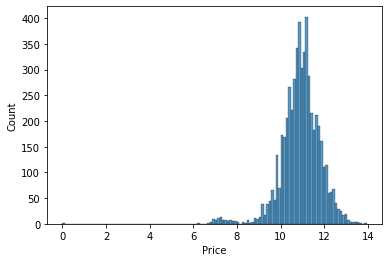

In [9]:
sns.histplot(df['Price'])
plt.show()

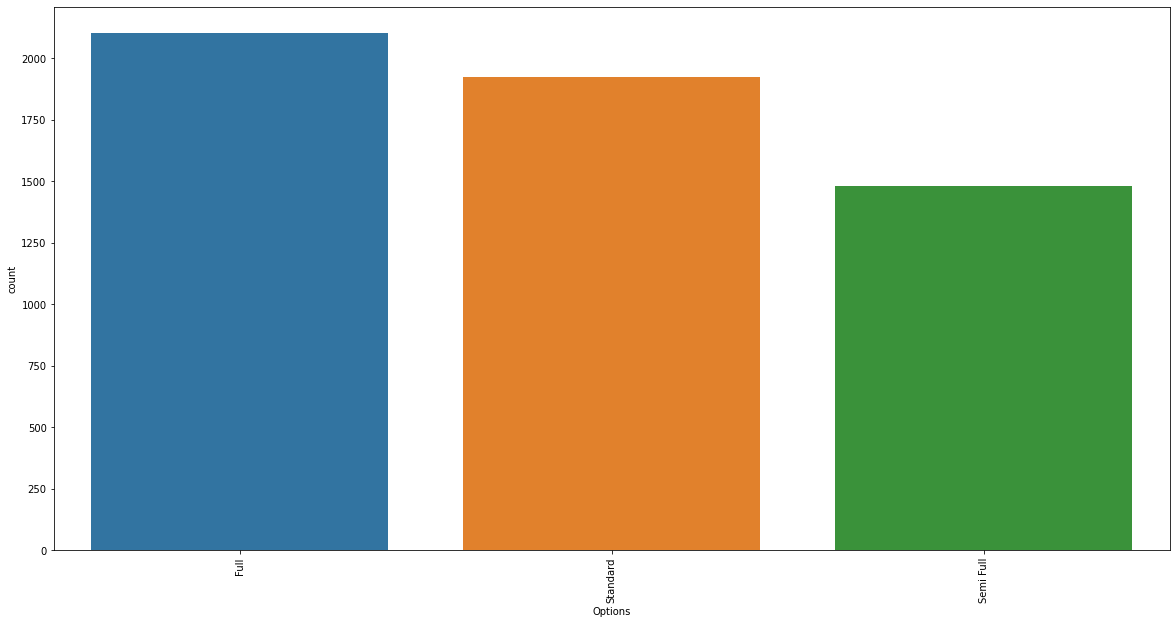

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Options',
              data = df,
              order = df['Options'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

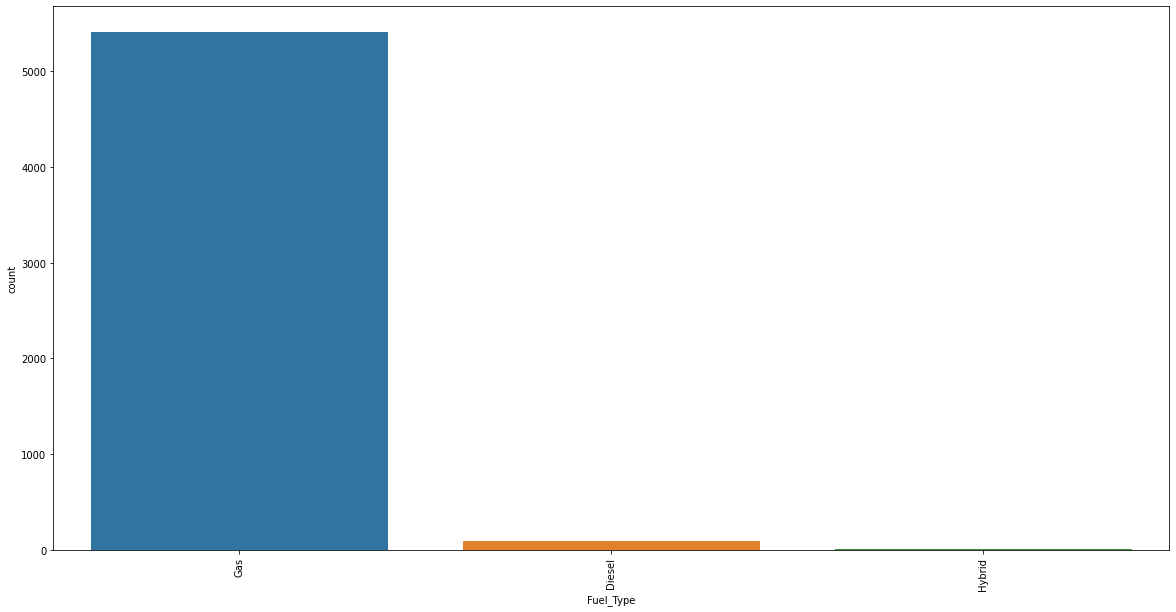

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Fuel_Type',
              data = df,
              order = df['Fuel_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

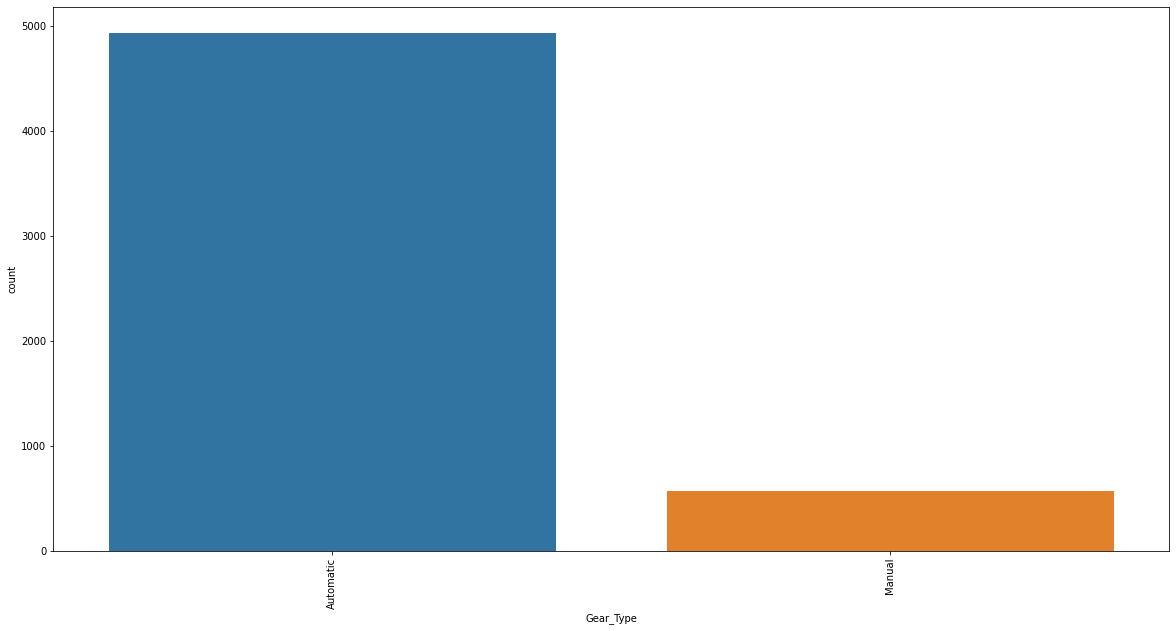

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Gear_Type',
              data = df,
              order = df['Gear_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

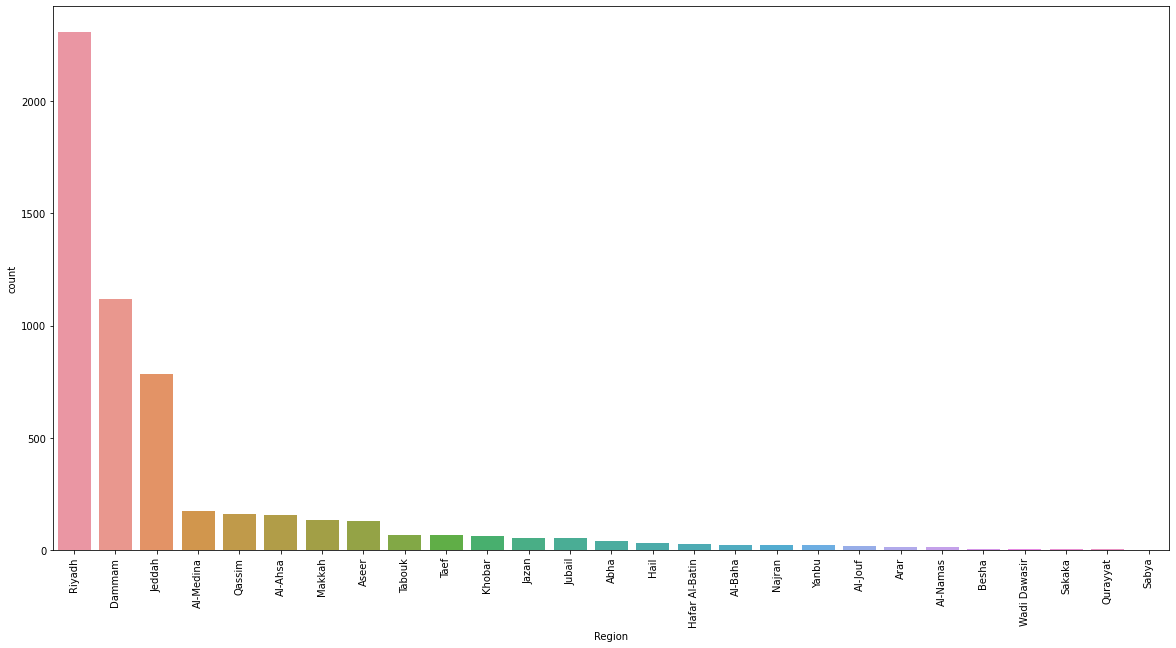

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Region',
              data = df,
              order = df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [14]:
transmission_mapping = {'Automatic': 0, 'Manual': 1}

df['Gear_Type'] = df['Gear_Type'].replace(transmission_mapping)

In [15]:
df['Fuel_Type'].unique()

array(['Gas', 'Diesel', 'Hybrid'], dtype=object)

In [16]:
label_mapping = {
    'Gas': 0,
    'Diesel': 1,
    'Hybrid': 2
}

df['Fuel_Type'] = df['Fuel_Type'].replace(label_mapping)

In [17]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [18]:
onehot_columns = [
    'Make',
    'Type',
    'Color',
    'Options',
    'Region'
]
onehot_prefixes = [
    'ma',
    'ty',
    'co',
    'op',
    'r'
]

In [19]:
df = onehot_encode(
    df,
    columns=onehot_columns,
    prefixes=onehot_prefixes
)

In [20]:
X=df.drop('Price',axis=1)
y=df['Price']

In [21]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=42)

In [23]:
rid = Ridge(alpha=10)

In [24]:
rid.fit(X_train,y_train)
rid_pred=rid.predict(X_test)

In [25]:
print("Accuracy on Traing set: ",rid.score(X_train,y_train))
print("Accuracy on Testing set: ",rid.score(X_test,y_test))

Accuracy on Traing set:  0.6286187166405351
Accuracy on Testing set:  0.5632312965336643


In [26]:
mae=mean_absolute_error(rid_pred,y_test)
mse=mean_squared_error(rid_pred,y_test)
rmse=np.sqrt(mean_squared_error(rid_pred,y_test))

In [27]:
print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_absolute_error :',rmse)

mean_absolute_error : 0.30984743273161675
mean_squared_error : 0.3444996975354243
root_mean_absolute_error : 0.5869409659713866


# Support vector Regressor

In [28]:
model_svr=SVR()
model_svr.fit(X_train,y_train)
svr_pred=model_svr.predict(X_test)

In [29]:
model_svr=SVR()

In [30]:
model_svr.fit(X_train,y_train)

SVR()

In [31]:
print("Accuracy on Traing set: ",model_svr.score(X_train,y_train))
print("Accuracy on Testing set: ",model_svr.score(X_test,y_test))

Accuracy on Traing set:  0.6282208752759262
Accuracy on Testing set:  0.576574338412734


In [32]:
mae=mean_absolute_error(svr_pred,y_test)
mse=mean_squared_error(svr_pred,y_test)
rmse=np.sqrt(mean_squared_error(svr_pred,y_test))

In [33]:
print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_absolute_error :',rmse)

mean_absolute_error : 0.2697711794866246
mean_squared_error : 0.3339754226616494
root_mean_absolute_error : 0.5779060673341727
